# Building A Portfolio by Calculating Annual Returns and Annual Risks with Python
Reference: https://youtu.be/tjv9yYpvYc8

In [42]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import yfinance as yf

In [43]:
# Defining al the portfolio tickers
tickers = ['META','AMZN', 'TSLA', 'GOOG', 'NFLX', 'AAPL', 'CRM', 'MSFT', 'NVDA', 'SPY', 'VGT', 'VOO', 'VTI', 'SHOP', 'GM', 'AMD', 'QQQ', 'V', 'T']

Ticker and Company Name:
- META: Meta Platforms, Inc.
- AMZN: Amazon.com, Inc.
- TSLA: Tesla, Inc.
- GOOG: Alphabet Inc.
- NFLX: Netflix, Inc.
- AAPL: Apple Inc.
- CRM: Salesforce.com, Inc.
- MSFT: Microsoft Corporation
- NVDA: NVIDIA Corporation
- SPY: SPDR S&P 500 ETF Trust
- VGT: Vanguard Information Technology ETF
- VOO: Vanguard S&P 500 ETF
- VTI: Vanguard Total Stock Market ETF
- SHOP: Shopify Inc.
- GM: General Motors Company
- AMD: Advanced Micro Devices, Inc.
- QQQ: Invesco QQQ Trust
- V: Visa Inc.
- T: AT&T Inc.

In [44]:
# Iterating through the tickers to get the ajusted close prices
df = pd.DataFrame()
for i in tickers:
    df[i] = yf.download(i, start = '2017-01-03',
                        end = '2022-01-01',
                        progress = False)['Adj Close']

In [45]:
# Showing the dataframe
df.head()

,META,AMZN,TSLA,GOOG,NFLX,AAPL,CRM,MSFT,NVDA,SPY,VGT,VOO,VTI,SHOP,GM,AMD,QQQ,V,T
Date,,,,,,,,,,,,,,,,,,,
2017-01-03,116.736145,37.683498,14.466000,39.306999,127.489998,26.989265,70.540001,57.033260,25.134890,199.819550,114.289581,182.774643,103.168900,4.282,30.193329,11.43,113.663765,75.648445,18.589615
2017-01-04,118.564201,37.859001,15.132667,39.345001,129.410004,26.959063,72.800003,56.778072,25.721310,201.008301,114.980217,183.853210,103.959091,4.414,31.859756,11.43,114.281830,76.266953,18.481588
2017-01-05,120.542099,39.022499,15.116667,39.701000,131.809998,27.096153,72.790001,56.778072,25.068361,200.848618,115.064209,183.711777,103.754868,4.768,31.258471,11.24,114.928406,77.161423,18.429737
2017-01-06,123.279205,39.799500,15.267333,40.307499,131.070007,27.398228,73.800003,57.270206,25.403456,201.567215,116.118843,184.427917,104.083389,4.690,30.914879,11.32,115.936302,78.227158,18.130816
2017-01-09,124.767624,39.846001,15.418667,40.332500,130.949997,27.649183,73.959999,57.087936,26.433395,200.901855,116.324173,183.844376,103.683846,4.718,30.932062,11.49,116.316620,77.789452,17.902645


In [46]:
# Showing the dataframe
df.tail()

,META,AMZN,TSLA,GOOG,NFLX,AAPL,CRM,MSFT,NVDA,SPY,VGT,VOO,VTI,SHOP,GM,AMD,QQQ,V,T
Date,,,,,,,,,,,,,,,,,,,
2021-12-27,345.813080,169.669495,364.646667,148.063995,613.119995,178.065659,258.299988,335.668396,309.009338,462.609863,458.765472,424.745331,235.328796,140.059006,56.398804,154.360001,397.779938,213.895554,16.059635
2021-12-28,345.853058,170.660995,362.823334,146.447998,610.710022,177.038696,255.449997,334.492218,302.788147,462.231781,455.556732,424.425934,234.844513,137.561996,56.084545,153.149994,395.936310,214.308319,16.085562
2021-12-29,342.576538,169.201004,362.063324,146.504501,610.539978,177.127563,254.539993,335.178314,299.582733,462.823090,455.596161,424.938965,234.980087,139.207993,56.202396,148.259995,395.877167,214.426254,15.968905
2021-12-30,343.994995,168.644501,356.779999,146.002502,612.090027,175.962387,255.330002,332.600372,295.438629,461.543579,453.214172,423.738678,234.602356,139.824005,57.086231,145.149994,394.694153,214.131393,16.059635
2021-12-31,335.993500,166.716995,352.260010,144.679504,602.440002,175.340317,254.130005,329.659760,293.691132,460.380371,450.960205,422.577148,233.856537,137.738998,57.577255,143.899994,392.229492,212.991302,15.942977


In [47]:
# Calculating daily simple returns
daily_simple_returns = df.pct_change(1)
daily_simple_returns.head()

,META,AMZN,TSLA,GOOG,NFLX,AAPL,CRM,MSFT,NVDA,SPY,VGT,VOO,VTI,SHOP,GM,AMD,QQQ,V,T
Date,,,,,,,,,,,,,,,,,,,
2017-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-04,0.015660,0.004657,0.046085,0.000967,0.015060,-0.001119,0.032039,-0.004474,0.023331,0.005949,0.006043,0.005901,0.007659,0.030827,0.055192,0.000000,0.005438,0.008176,-0.005811
2017-01-05,0.016682,0.030732,-0.001057,0.009048,0.018546,0.005085,-0.000137,0.000000,-0.025386,-0.000794,0.000730,-0.000769,-0.001964,0.080199,-0.018873,-0.016623,0.005658,0.011728,-0.002806
2017-01-06,0.022707,0.019912,0.009967,0.015277,-0.005614,0.011148,0.013876,0.008668,0.013367,0.003578,0.009166,0.003898,0.003166,-0.016359,-0.010992,0.007117,0.008770,0.013812,-0.016220
2017-01-09,0.012074,0.001168,0.009912,0.000620,-0.000916,0.009160,0.002168,-0.003183,0.040543,-0.003301,0.001768,-0.003164,-0.003839,0.005970,0.000556,0.015018,0.003280,-0.005595,-0.012585


In [48]:
# Calculating annual returns
annual_returns = ((1 + daily_simple_returns.mean())**(252)) - 1
annual_returns

META    0.306377
AMZN    0.406323
TSLA    1.270863
GOOG    0.346384
NFLX    0.467212
AAPL    0.523732
CRM     0.367101
MSFT    0.475763
NVDA    0.828336
SPY     0.203312
VGT     0.355898
VOO     0.204928
VTI     0.200271
SHOP    1.291285
GM      0.223844
AMD     0.943734
QQQ     0.314123
V       0.274667
T      -0.002621
dtype: float64

In [49]:
# Calculating annual risks 
# Multiplica o desvio padrão dos retornos diários simples pela raiz quadrada do número de dias de negociação em um ano
annual_risks = daily_simple_returns.std() * math.sqrt(252)
annual_risks

META    0.331638
AMZN    0.294334
TSLA    0.603585
GOOG    0.269893
NFLX    0.381580
AAPL    0.304499
CRM     0.336381
MSFT    0.274915
NVDA    0.470348
SPY     0.188611
VGT     0.242510
VOO     0.192012
VTI     0.192420
SHOP    0.517935
GM      0.381651
AMD     0.562022
QQQ     0.223434
V       0.265983
T       0.236812
dtype: float64

In [50]:
# Sort the data in descending order
sorted_annualized_returns = annual_returns.sort_values(ascending=False)
sorted_annualized_returns

SHOP    1.291285
TSLA    1.270863
AMD     0.943734
NVDA    0.828336
AAPL    0.523732
MSFT    0.475763
NFLX    0.467212
AMZN    0.406323
CRM     0.367101
VGT     0.355898
GOOG    0.346384
QQQ     0.314123
META    0.306377
V       0.274667
GM      0.223844
VOO     0.204928
SPY     0.203312
VTI     0.200271
T      -0.002621
dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

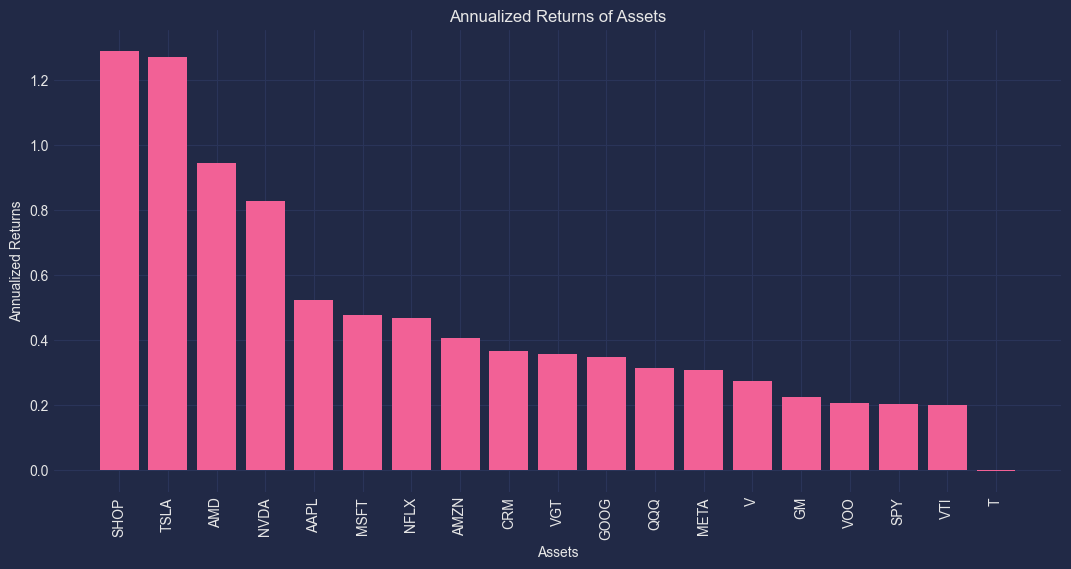

In [51]:
# Plot the sort annualized returns
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')
plt.figure(figsize=(13,6))
plt.bar(sorted_annualized_returns.index, sorted_annualized_returns, color = '#f26196')
plt.ylabel('Annualized Returns')
plt.xlabel('Assets')
plt.xticks(rotation = 90)
plt.title('Annualized Returns of Assets')
plt.show

In [52]:
# Create a dataframe to store the annual returns, annual risks and company ticker + create a ratio column
df2 = pd.DataFrame()
df2['Expected Annual Return'] = annual_returns
df2['Expected Annual Risk'] = annual_risks
df2['Company Ticker'] = df2.index
# Relação entre retorno esperado e risco (quanto maior, melhor) - 
df2['Ratio'] = df2['Expected Annual Return'] / df2['Expected Annual Risk']
df2.sort_values(by='Ratio', axis = 0, ascending = False, inplace = False)

,Expected Annual Return,Expected Annual Risk,Company Ticker,Ratio
SHOP,1.291285,0.517935,SHOP,2.493139
TSLA,1.270863,0.603585,TSLA,2.105525
NVDA,0.828336,0.470348,NVDA,1.761115
MSFT,0.475763,0.274915,MSFT,1.730582
AAPL,0.523732,0.304499,AAPL,1.719982
AMD,0.943734,0.562022,AMD,1.679176
VGT,0.355898,0.242510,VGT,1.467563
QQQ,0.314123,0.223434,QQQ,1.405889
AMZN,0.406323,0.294334,AMZN,1.380484
GOOG,0.346384,0.269893,GOOG,1.283412


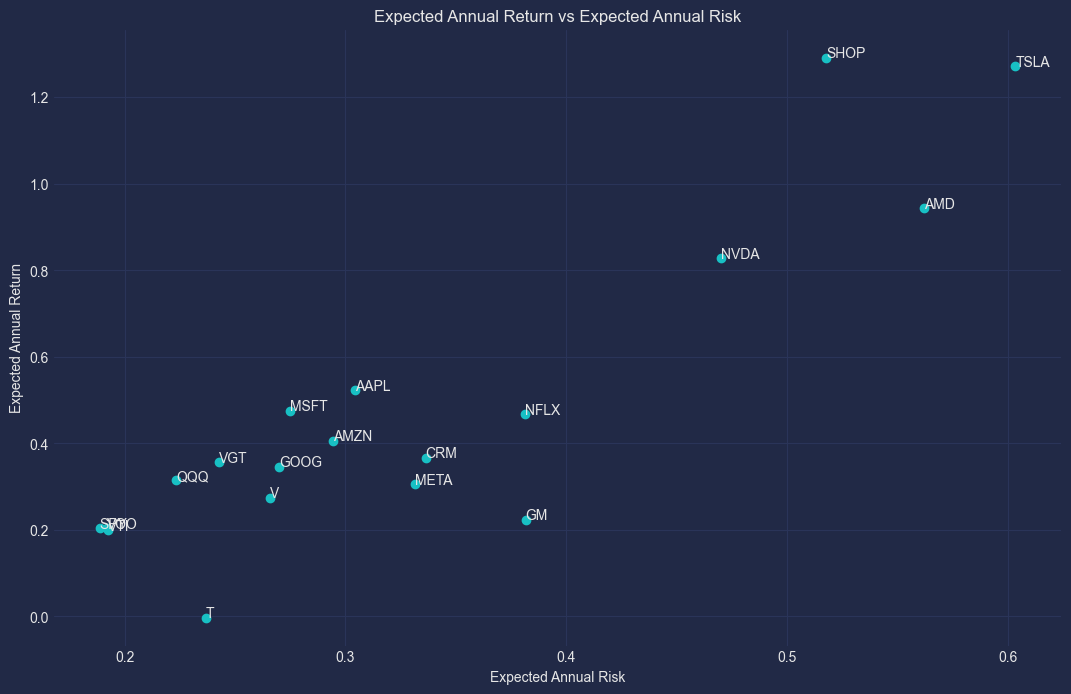

In [53]:
# Visually show the expected annual returns vs expected annual risks
fig, ax = plt.subplots(figsize=(13,8))
plt.title('Expected Annual Return vs Expected Annual Risk')
ax.scatter(df2['Expected Annual Risk'], df2['Expected Annual Return'])
ax.set_xlabel('Expected Annual Risk')
ax.set_ylabel('Expected Annual Return')

# Annotate the points on the plot
for idx, row in df2.iterrows():
    ax.annotate(row['Company Ticker'], (row['Expected Annual Risk'], row['Expected Annual Return']))

# Show the scatter plot
plt.show()

In [54]:
# Showing an example of an asset that has a higher return and a lower risk than another asset (e.g. AMZN)
row = 'AMZN'
df2.loc[(df2['Expected Annual Return'] > df2.loc[row, 'Expected Annual Return']) & 
        (df2['Expected Annual Risk'] < df2.loc[row, 'Expected Annual Risk'])]

,Expected Annual Return,Expected Annual Risk,Company Ticker,Ratio
MSFT,0.475763,0.274915,MSFT,1.730582


In [55]:
# Gathering a list of tickers that have lower return and more risk than other in this dataset
remove_asset_list = []
for ticker in df2['Company Ticker'].values:
    # Verifica se há ativos que têm um retorno maior e um risco menor do que o ativo atual
    no_better_assets_exists = df2.loc[(df2['Expected Annual Return'] > df2.loc[ticker, 'Expected Annual Return']) & (df2['Expected Annual Risk'] < df2.loc[ticker, 'Expected Annual Risk'])].empty
    # Isso sugere que o ativo atual não está na fronteira eficiente, então não iremos considerá-lo na carteira
    if no_better_assets_exists == False:
        remove_asset_list.append(ticker)

# Show
remove_asset_list

['META', 'AMZN', 'TSLA', 'GOOG', 'NFLX', 'CRM', 'VTI', 'GM', 'AMD', 'V', 'T']

In [56]:
# Show the assets that have the highest returns and lower risks
df3 = df2.drop(remove_asset_list)
df3

,Expected Annual Return,Expected Annual Risk,Company Ticker,Ratio
AAPL,0.523732,0.304499,AAPL,1.719982
MSFT,0.475763,0.274915,MSFT,1.730582
NVDA,0.828336,0.470348,NVDA,1.761115
SPY,0.203312,0.188611,SPY,1.077940
VGT,0.355898,0.242510,VGT,1.467563
VOO,0.204928,0.192012,VOO,1.067265
SHOP,1.291285,0.517935,SHOP,2.493139
QQQ,0.314123,0.223434,QQQ,1.405889


In [57]:
# Redoing the calculations for the new portfolio
assets = df3.index
num_assets = len(assets)
num_assets

8

In [58]:
# Calculate the new simple daily returns
daily_simple_returns = df[assets].pct_change(1)

# Calculate the new annual returns
annual_returns = daily_simple_returns.mean() * 252

# Create weights
# Calculando pesos iguais para todos os ativos
n = 1 / float(num_assets)
# Atribuindo esses pesos 'num_assets' vezes
weights = [n] * num_assets
# Transformando isso em um array
weights = np.array(weights)
weights

array([0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125])

In [59]:
# Calculate the covariance matrix
cov_matrix_annual = daily_simple_returns.cov() * 252
cov_matrix_annual

,AAPL,MSFT,NVDA,SPY,VGT,VOO,SHOP,QQQ
AAPL,0.092719,0.061712,0.085928,0.043787,0.063272,0.044448,0.073423,0.057539
MSFT,0.061712,0.075578,0.084431,0.043133,0.060365,0.043956,0.078482,0.055571
NVDA,0.085928,0.084431,0.221227,0.057479,0.086404,0.058332,0.125480,0.079100
SPY,0.043787,0.043133,0.057479,0.035574,0.042455,0.036176,0.047114,0.038717
VGT,0.063272,0.060365,0.086404,0.042455,0.058811,0.043147,0.076793,0.053006
VOO,0.044448,0.043956,0.058332,0.036176,0.043147,0.036869,0.047671,0.039341
SHOP,0.073423,0.078482,0.125480,0.047114,0.076793,0.047671,0.268257,0.070304
QQQ,0.057539,0.055571,0.079100,0.038717,0.053006,0.039341,0.070304,0.049923


In [60]:
# Calculate the variance (não entendi 100% essa parte)
portfolio_variance = np.dot(weights.T, np.dot(cov_matrix_annual, weights))
portfolio_variance

0.0661576974028554

In [61]:
# Calculate the annual volatility or risk
portfolio_volatility = np.sqrt(portfolio_variance)
portfolio_volatility

0.257211386611976

In [62]:
# Calculate and show the expected returns as a percentage
portfolio_returns_expected = np.sum(weights * annual_returns)
print(str(round(portfolio_returns_expected * 100, 2))+'%')

39.94%
